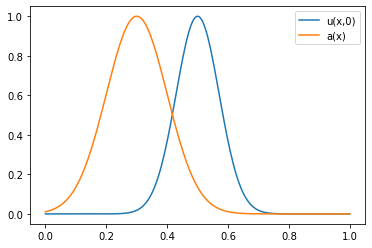

In [90]:
#%load_ext autoreload
#%autoreload 2

import heat_kernel as hk
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import pylab as pl

n = 200
a = np.ones(n)
nt = 10000
x = np.linspace(0, 1, n)
u = np.exp( -100 * (x-0.5)**2)
a = np.exp( -50 * (x-0.3)**2)
v = np.empty_like(u)
h = x[1] - x[0]
dt = 0.25 * h ** 2
stride = 100
d_a = hk.array(a)
d_u = hk.array(u)
d_v = hk.array(v)




f = hk.heat_equation(d_v, d_u, d_a, dt, h)

fig = plt.figure()
plt.plot(x, u, label="u(x,0)")
plt.plot(x, a, label="a(x)")
plt.legend()


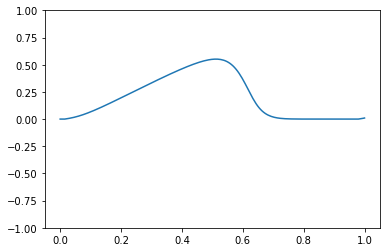

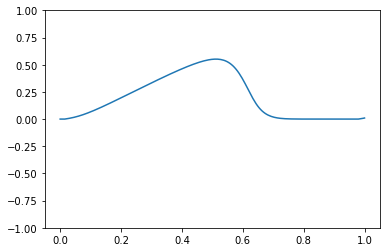

In [91]:

for k in range(nt):
    f(d_v, d_u)

    if k % stride == 0:
        v = d_u.get()
        plt.clf()
        plt.plot(x, v, "C0")
        plt.ylim((-1,1))
        display.clear_output(wait=True)
        display.display(pl.gcf())
        
    # swap pointers
    g = d_u
    d_u = d_v
    d_v = g
    